In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

11501568/11490434 [==============================] - 0s 0us/step


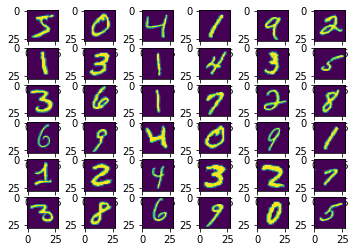

In [3]:
fig,axs=plt.subplots(6,6)
k = 0
for i in range(6):
  for j in range(6):
    axs[i][j].imshow(x_train[k])
    k+=1
plt.show()


In [4]:
K=len(set(y_train))

inputs=Input(shape=(28,28))
layer=LSTM(128,activation="relu")(inputs)
layer=keras.layers.Dense(K,activation="softmax")(layer)
model=keras.models.Model(inputs,layer)

In [5]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [6]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=3
)

Epoch 1/3
1875/1875 [==============================] - 58s 30ms/step - loss: 0.5555 - accuracy: 0.8207 - val_loss: 0.1567 - val_accuracy: 0.9541
Epoch 2/3
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1211 - accuracy: 0.9636 - val_loss: 0.0892 - val_accuracy: 0.9746
Epoch 3/3
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.0740 - val_accuracy: 0.9785


Predicted result is: 1, target result is: 1
Predicted result is: 5, target result is: 5
Predicted result is: 8, target result is: 8
Predicted result is: 4, target result is: 4
Predicted result is: 9, target result is: 9


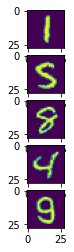

In [7]:
labels=[0,1,2,3,4,5,6,7,8,9]
imgset=np.random.randint(1000, size=(5))
fig2,axs2=plt.subplots(5)
for ind in range(len(imgset)):

  image_number=imgset[ind]
  axs2[ind].imshow(x_test[image_number])
  n=np.array(x_test[image_number])
  p=n.reshape(1,28,28,1)
  predicted_label=labels[model.predict(p).argmax()]
  original_label=labels[y_test[image_number]]
  
  print(
          "Predicted result is: %s, target result is: %s" % (predicted_label,original_label)
      )